# Lab | Customer Analysis Round 5

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('marketing_customer_analysis.csv')

1. Show the dataframe shape.

In [4]:
print(df.shape)

(9134, 24)


2. Standardize header names.

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

3. Which columns are numerical?

In [6]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


4. Which columns are categorical?

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


5. Check and deal with NaN values.

In [8]:
print(df.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter, ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [9]:
date_cols = ['months_since_last_claim', 'months_since_policy_inception']
for col in date_cols:
    df[f'{col}_month'] = pd.to_datetime(df[col]).dt.month

df['month'] = df[[f'{col}_month' for col in date_cols]].max(axis=1)
q1_df = df[(df['month'] >= 1) & (df['month'] <= 3)]

print(q1_df)

     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor           2/24/11         Employed 

# Round 3

1. Show DataFrame info.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer                             9134 non-null   object 
 1   state                                9134 non-null   object 
 2   customer_lifetime_value              9134 non-null   float64
 3   response                             9134 non-null   object 
 4   coverage                             9134 non-null   object 
 5   education                            9134 non-null   object 
 6   effective_to_date                    9134 non-null   object 
 7   employmentstatus                     9134 non-null   object 
 8   gender                               9134 non-null   object 
 9   income                               9134 non-null   int64  
 10  location_code                        9134 non-null   object 
 11  marital_status                

2. Describe DataFrame.

In [11]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months_since_last_claim_month,months_since_policy_inception_month,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.0,9134.0,9134.0
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.0,1.0,1.0
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.0,0.0,0.0
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.0,1.0,1.0
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.0,1.0,1.0
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.0,1.0,1.0
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,1.0,1.0,1.0
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.0,1.0,1.0


3. Show a plot of the total number of responses.

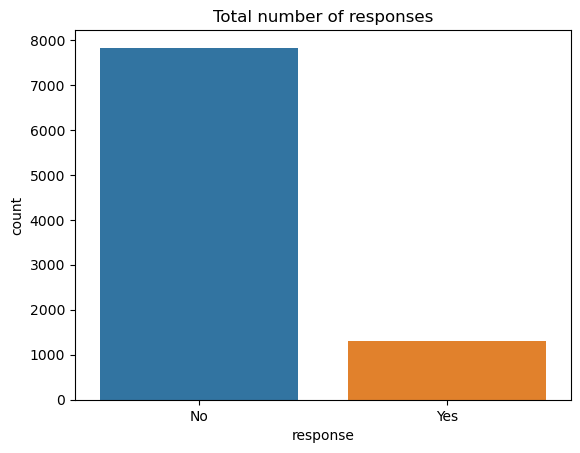

In [12]:
sns.countplot(x='response', data=df)
plt.title('Total number of responses')
plt.show()

4.Show a plot of the response rate by the sales channel.

In [13]:
df['response_numeric'] = df['response'].map({'Yes': 1, 'No': 0})
response_rate = df.groupby('sales_channel')['response_numeric'].mean().reset_index()

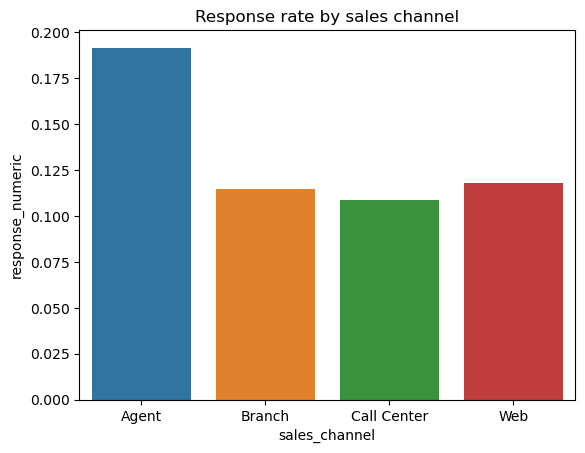

In [14]:
sns.barplot(x='sales_channel', y='response_numeric', data=response_rate)
plt.title('Response rate by sales channel')
plt.show()

5. Show a plot of the response rate by the total claim amount.

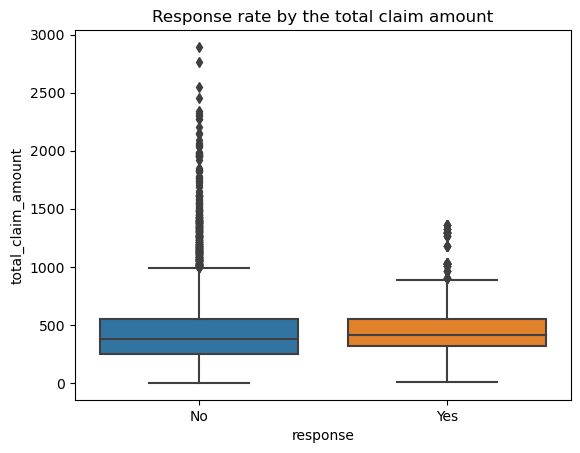

In [15]:
sns.boxplot(x='response', y='total_claim_amount', data=df)
plt.title('Response rate by the total claim amount')
plt.show()

6. Show a plot of the response rate by income.

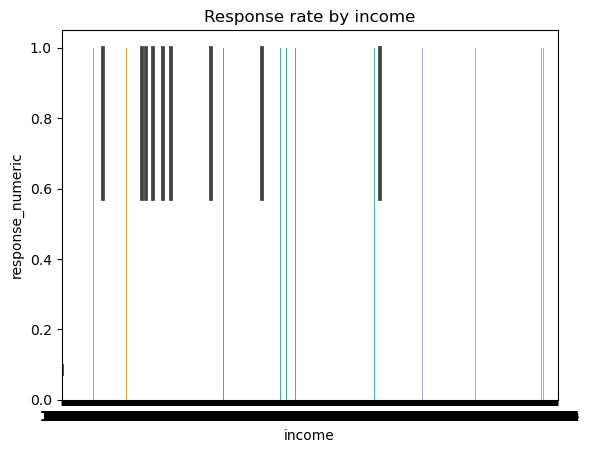

In [16]:
sns.barplot(x='income', y='response_numeric', data=df)
plt.title('Response rate by income')
plt.show()

# Round 4

Check the data types of the columns

In [17]:
print(df.dtypes)

customer                                object
state                                   object
customer_lifetime_value                float64
response                                object
coverage                                object
education                               object
effective_to_date                       object
employmentstatus                        object
gender                                  object
income                                   int64
location_code                           object
marital_status                          object
monthly_premium_auto                     int64
months_since_last_claim                  int64
months_since_policy_inception            int64
number_of_open_complaints                int64
number_of_policies                       int64
policy_type                             object
policy                                  object
renew_offer_type                        object
sales_channel                           object
total_claim_a

Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [18]:
numerical = df.select_dtypes(include=[np.number])

In [19]:
categoricals = df.select_dtypes(include=[np.object])

C:\Users\andre\AppData\Local\Temp\ipykernel_26468\68347119.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(include=[np.object])


Use seaborn library to construct distribution plots for the numerical variables

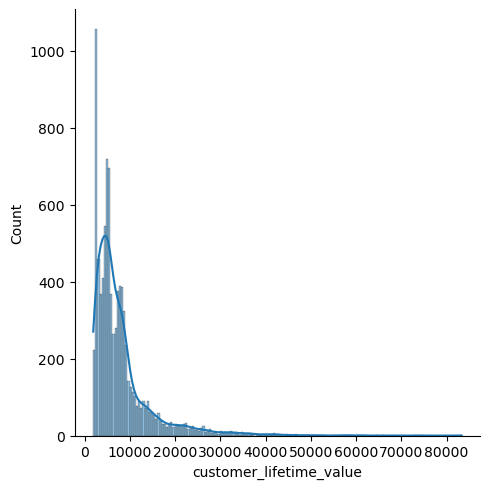

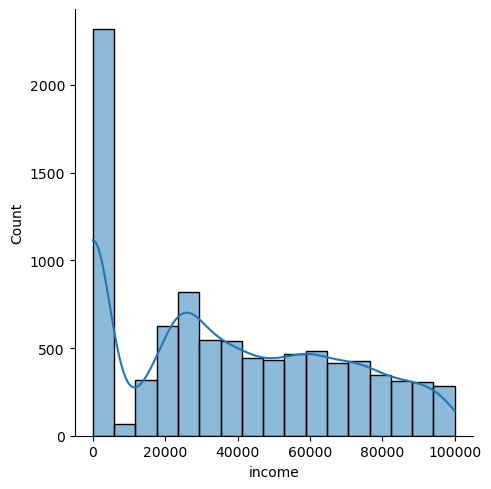

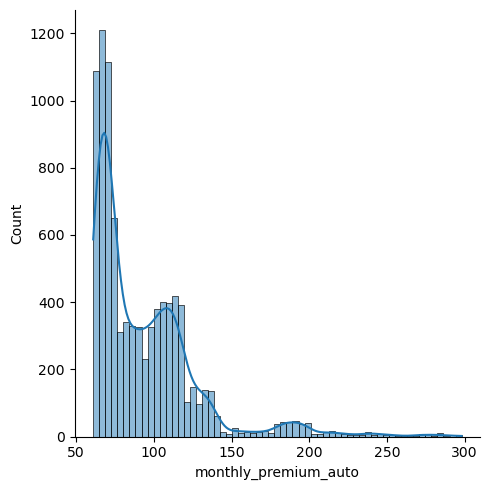

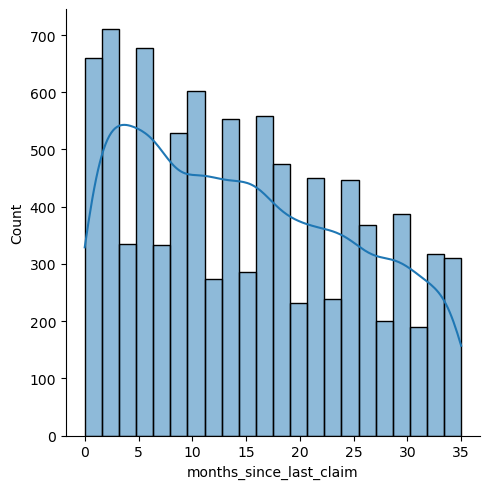

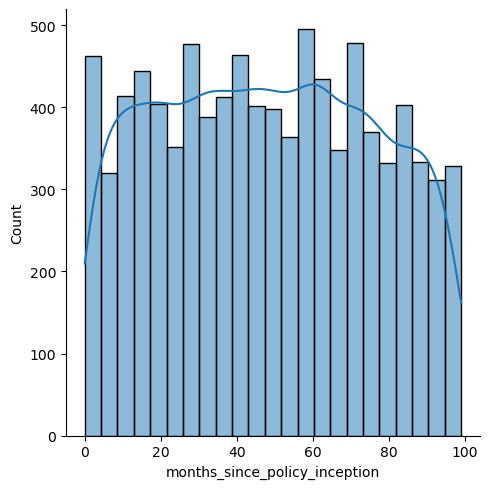

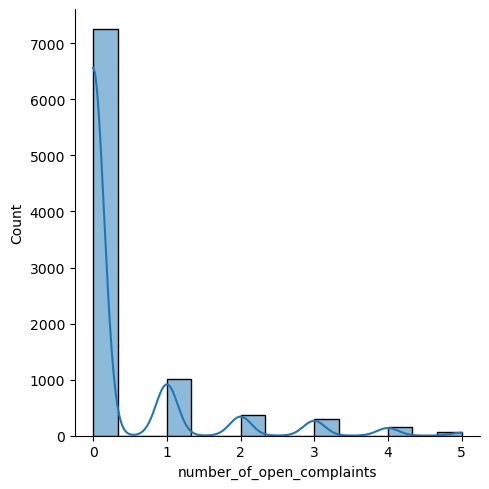

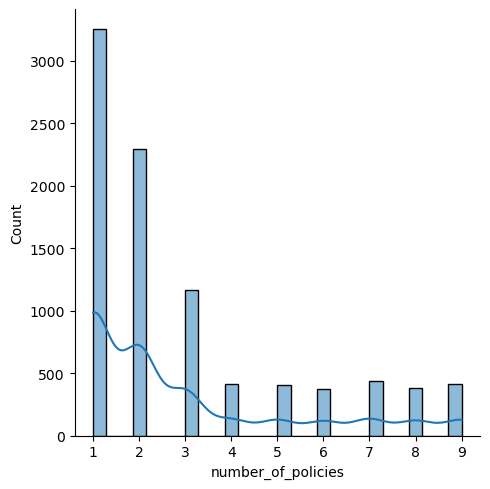

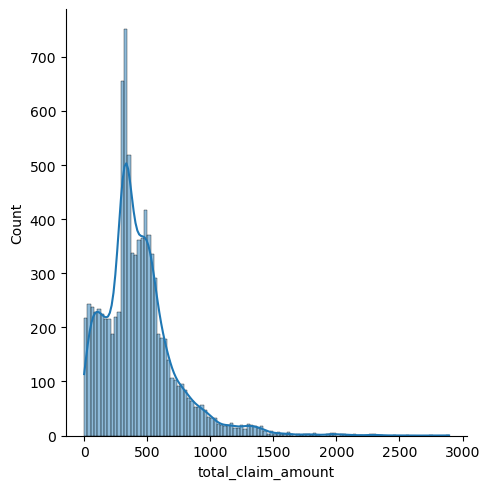

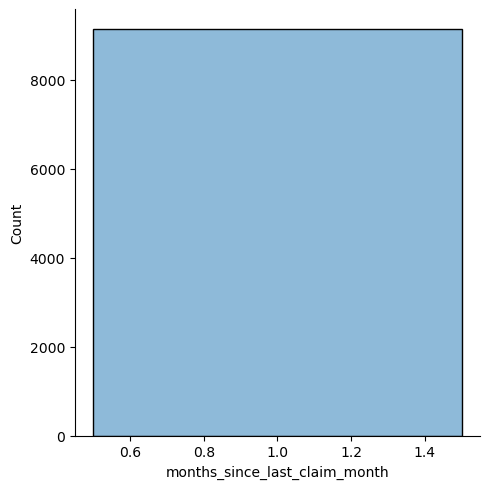

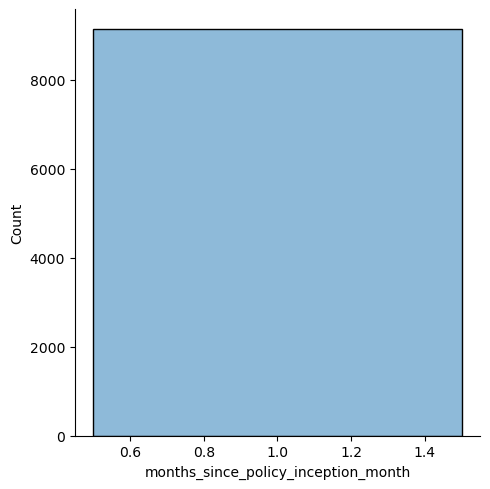

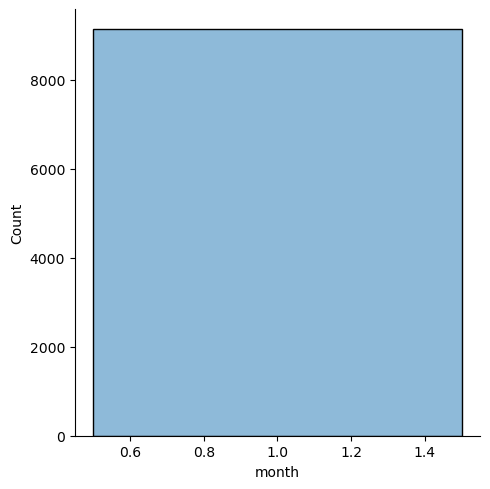

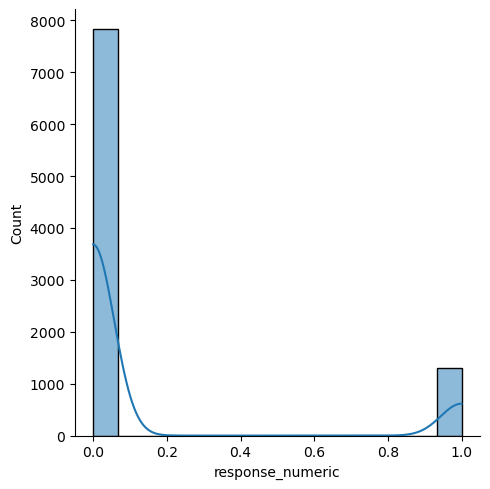

In [20]:
for column in numerical.columns:
    sns.displot(numerical[column], kde=True)
    plt.show()

Use Matplotlib to construct histograms

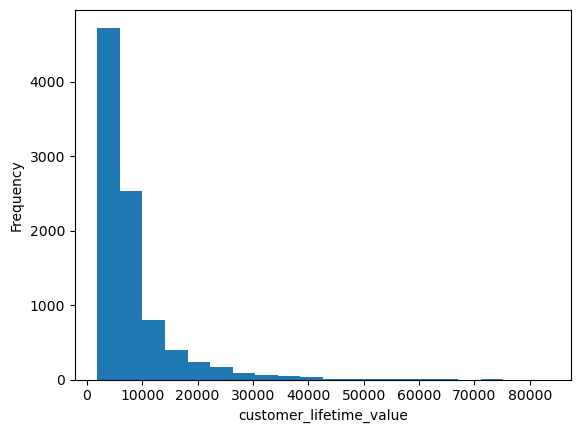

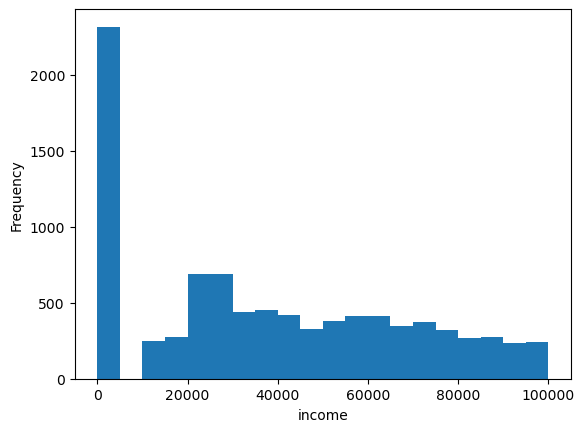

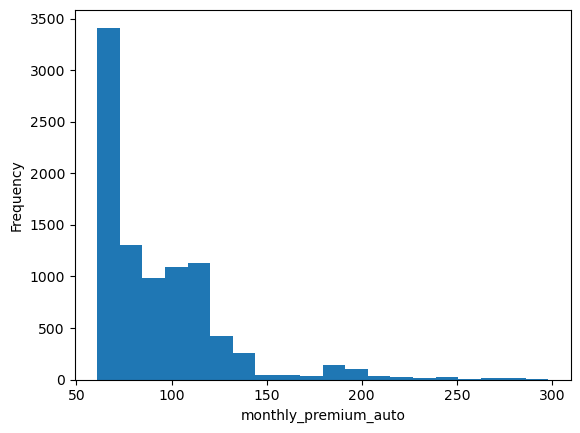

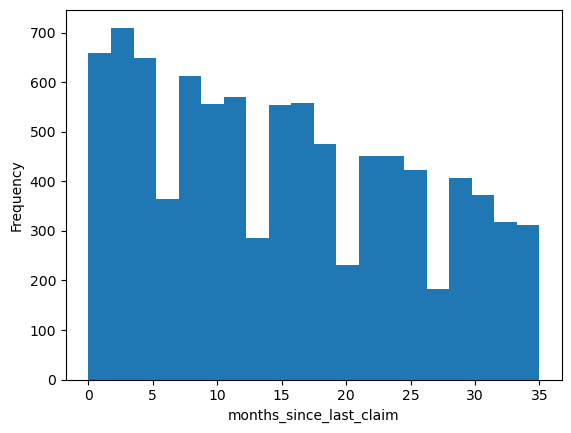

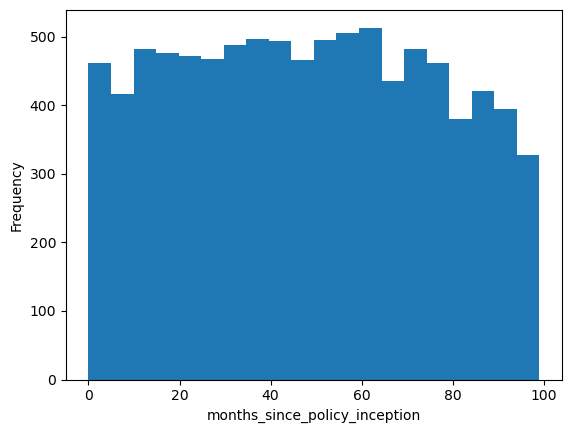

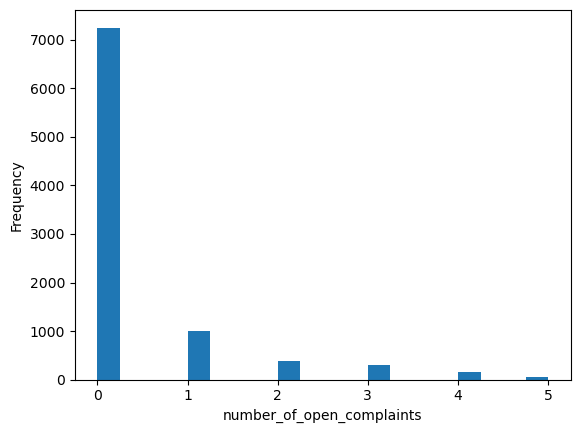

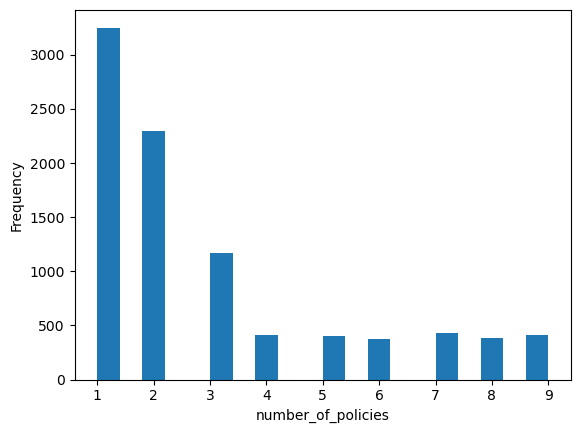

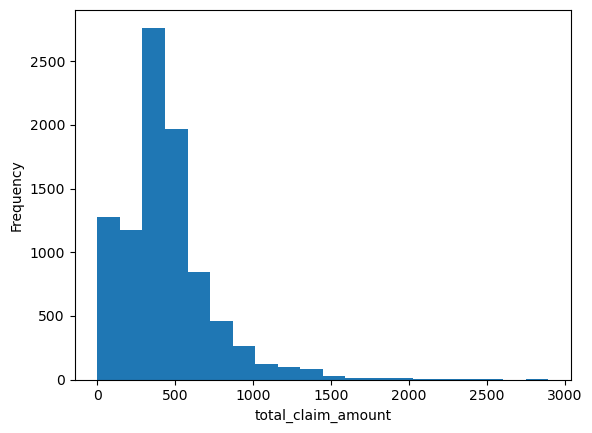

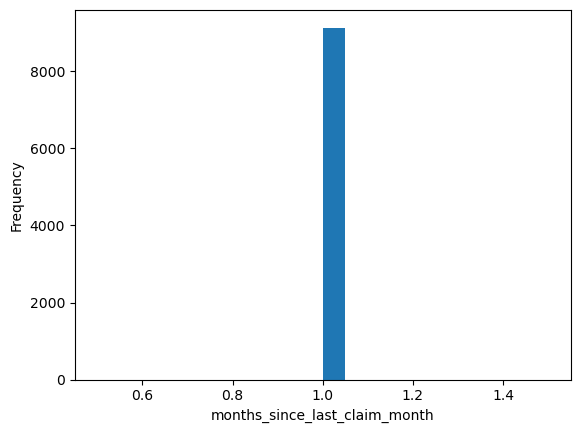

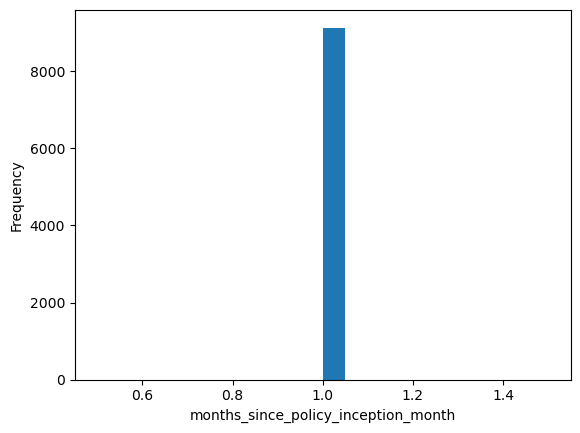

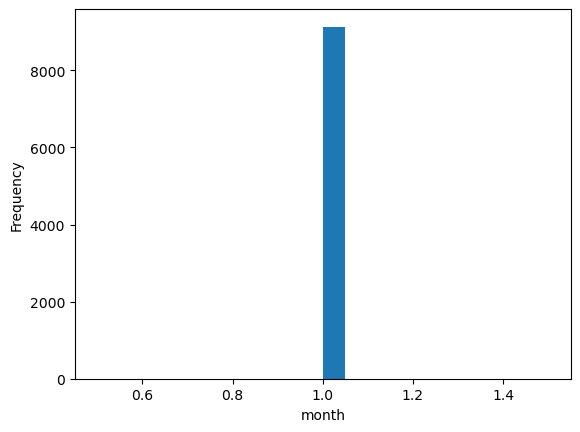

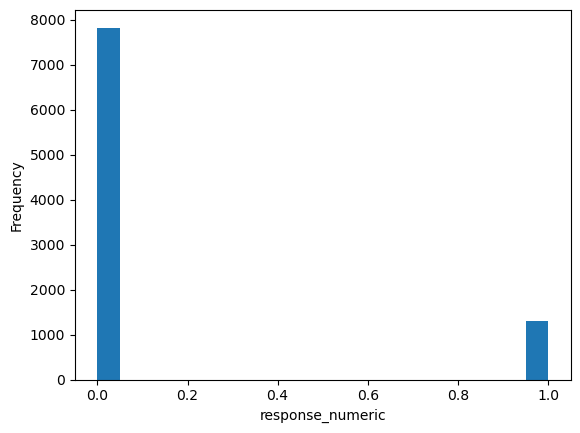

In [21]:
for column in numerical.columns:
    plt.hist(numerical[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

For the numerical variables, check the multicollinearity between the features.

In [22]:
plt.figure(figsize=(10, 8))
corr_matrix = numerical.corr()

<Figure size 1000x800 with 0 Axes>

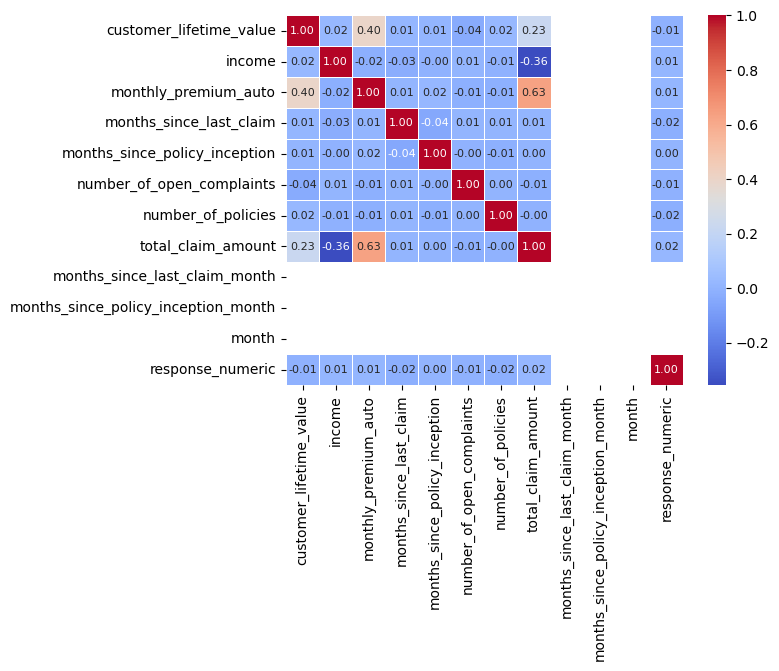

In [23]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 8})
plt.show()

# Round 5

X-y split

In [24]:
y = df['total_claim_amount']
X = df.drop('total_claim_amount', axis=1)

Normalize (numerical)

In [25]:
transformer = MinMaxScaler().fit(numerical)
x_minmax = transformer.transform(numerical)
print(x_minmax.shape)

(9134, 12)


In [26]:
numerical_norm = pd.DataFrame(x_minmax, columns=numerical.columns)
numerical_norm.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months_since_last_claim_month,months_since_policy_inception_month,month,response_numeric
4755,0.030822,0.000000,0.004219,0.514286,0.343434,0.0,0.250,0.039403,0.0,0.0,0.0,0.0
3508,0.031648,0.979676,0.215190,0.257143,0.131313,0.6,0.000,0.112235,0.0,0.0,0.0,0.0
7302,0.038448,0.000000,0.025316,0.600000,0.606061,0.0,0.500,0.074693,0.0,0.0,0.0,0.0
8710,0.042848,0.939108,0.025316,0.457143,0.707071,0.0,0.875,0.034067,0.0,0.0,0.0,0.0
7785,0.085410,0.000000,0.092827,0.342857,0.979798,0.0,0.125,0.206523,0.0,0.0,0.0,0.0


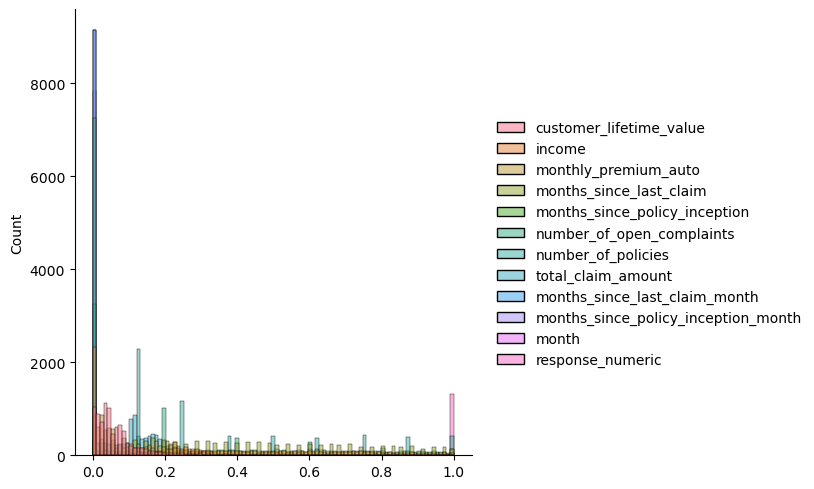

In [27]:
sns.displot(numerical_norm)